In [1]:
%matplotlib inline
import os
import sys
import six # Python 2 and 3 compatibility library; provides utility functions for smoothing over differences between versions 
import datetime
#import openpyxl
import pygal
import pandas as pd
import numpy as np
#from pandas import ExcelWriter
#from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
print( "Necessary packages/libraries are imported at " + str( datetime.datetime.now() ) )

Necessary packages/libraries are imported at 2021-02-02 09:01:49.268182


In [140]:
df = pd.read_excel("https://ncses.nsf.gov/pubs/nsf21303/assets/data-tables/tables/nsf21303-tab001.xlsx", skiprows = [0, 1, 2], usecols= [0, 1, 3, 5])

C:\Users\Muluken\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [141]:
df.head(25)

,Company and financial information,All companies,1–4 employees,5–9 employees
0,Total R&D cost,6655717,3525771,3129946
1,"R&D for salaries, wages, and fringe benefits",3656750,1895125,1761625
2,R&D for expensed machinery and equipment (not ...,256952,153000,103952
3,R&D for materials and supplies,583126,319901,263224
4,R&D for payments to business partners for coll...,361014,228498,132516
5,R&D for purchased R&D services,604337,285706,318632
6,R&D for depreciation on R&D property and equip...,91733,51480,40253
7,R&D for other costs,1101806,592061,509745
8,R&D paid for by company,5345991,2806839,2539152
9,R&D paid for by foreign owner,195846,94969,100877


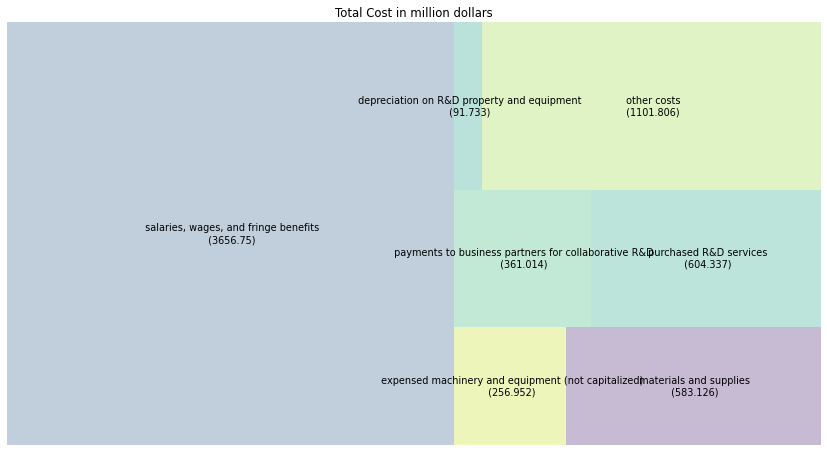

In [167]:
df1 = df.iloc[1:8] # R&D Cost in thousands of US dollars
df1.set_index('Company and financial information', inplace=True)
df11 = df1.div(1000).head(17)
df111 = df11.reset_index()
df111['Company and financial information'] = df111['Company and financial information'].str[7:]

labels = df111.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df111['All companies'].values.tolist()
#colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,8), dpi= 70)
squarify.plot(sizes=sizes, label=labels,  alpha=0.3)

# Decorate
plt.title('Total Cost in million dollars')
plt.axis('off')
plt.show()

In [161]:
df111

,Company and financial information,All companies,1–4 employees,5–9 employees
0,"salaries, wages, and fringe benefits",3656.750,1895.125,1761.625
1,expensed machinery and equipment (not capital...,256.952,153.000,103.952
2,materials and supplies,583.126,319.901,263.224
3,payments to business partners for collaborati...,361.014,228.498,132.516
4,purchased R&D services,604.337,285.706,318.632
5,depreciation on R&D property and equipment,91.733,51.480,40.253
6,other costs,1101.806,592.061,509.745


In [93]:
df1 = df.iloc[1:8] # R&D Cost in thousands of US dollars
df1.set_index('Company and financial information', inplace=True)
df11 = df1.div(1000).head(17)
df2 = df.iloc[8:17] # R&D Cost in thousands of US dollars
df2.set_index('Company and financial information', inplace=True)
df22 = df2.div(1000).head(17)
df3 = df.iloc[18:21] # R&D Cost in thousands of US dollars
df3.set_index('Company and financial information', inplace=True)
df33 = df3.div(1000).head(17)
df1.head(10)

,All companies,1–4 employees,5–9 employees
Company and financial information,,,
"R&D for salaries, wages, and fringe benefits",3656750,1895125,1761625
R&D for expensed machinery and equipment (not capitalized),256952,153000,103952
R&D for materials and supplies,583126,319901,263224
R&D for payments to business partners for collaborative R&D,361014,228498,132516
R&D for purchased R&D services,604337,285706,318632
R&D for depreciation on R&D property and equipment,91733,51480,40253
R&D for other costs,1101806,592061,509745


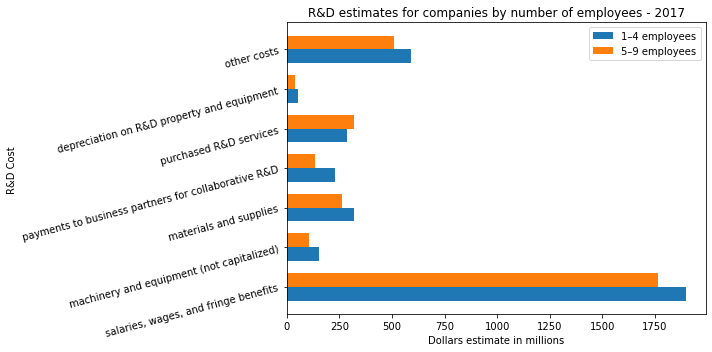

In [137]:
labels = ['salaries, wages, and fringe benefits', 'machinery and equipment (not capitalized)','materials and supplies',
          'payments to business partners for collaborative R&D', 'purchased R&D services', 'depreciation on R&D property and equipment',
         'other costs']
employees_1to4 = df11['1–4 employees'].tolist()
employees_5to9 = df11['5–9 employees'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
rects1 = ax.barh(x - width/2, employees_1to4, width, label='1–4 employees')
rects2 = ax.barh(x + width/2,employees_5to9, width, label='5–9 employees')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Dollars estimate in millions')
ax.set_ylabel('R&D Cost ')
ax.set_title('R&D estimates for companies by number of employees - 2017')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
plt.yticks(rotation = 15) # Rotates X-Axis Ticks by 45-degrees



fig.tight_layout()

plt.show()

array([0, 1, 2, 3, 4, 5, 6])

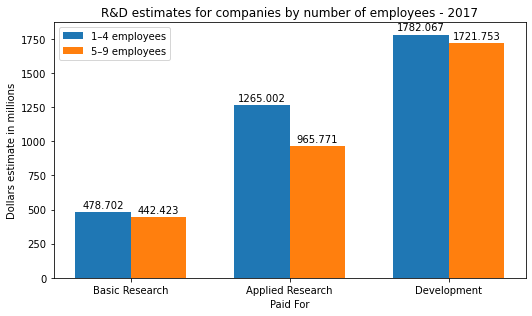

In [86]:
labels = ['Basic Research', 'Applied Research','Development']
employees_1to4 = df33['1–4 employees'].tolist()
employees_5to9 = df33['5–9 employees'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(4.5)
fig.set_figwidth(7.5)
rects1 = ax.bar(x - width/2, employees_1to4, width, label='1–4 employees')
rects2 = ax.bar(x + width/2,employees_5to9, width, label='5–9 employees')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollars estimate in millions')
ax.set_xlabel('Paid For')
ax.set_title('R&D estimates for companies by number of employees - 2017')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [138]:
# pip install squarify
import squarify 

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
# labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
# sizes = df['counts'].values.tolist()
# colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# # Draw Plot
# plt.figure(figsize=(12,8), dpi= 80)
# squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# # Decorate
# plt.title('Treemap of Vechile Class')
# plt.axis('off')
# plt.show()
df.head()

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33


In [11]:
df.head(33)

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [14]:
df_raw.head(100)
df_raw.shape

(234, 11)

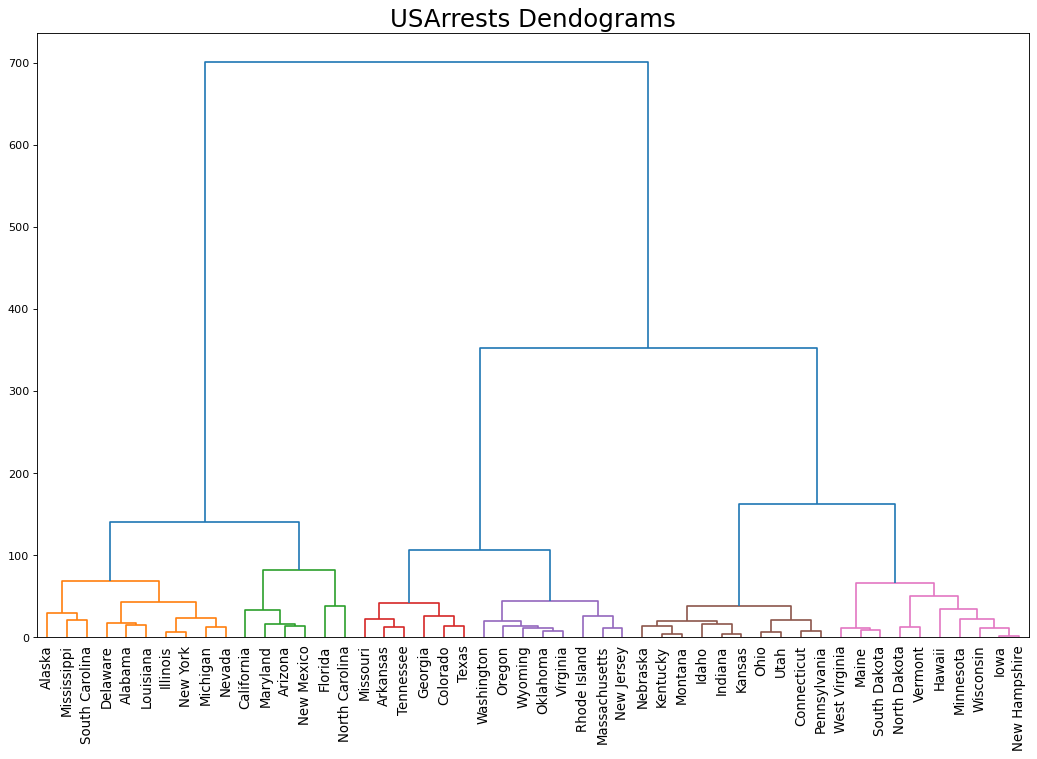

In [16]:
import scipy.cluster.hierarchy as shc
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

In [18]:
df.head(100)

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California
5,7.9,204,78,38.7,Colorado
6,3.3,110,77,11.1,Connecticut
7,5.9,238,72,15.8,Delaware
8,15.4,335,80,31.9,Florida
9,17.4,211,60,25.8,Georgia


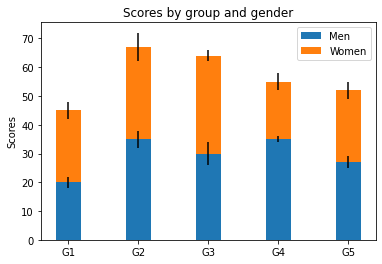

In [31]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

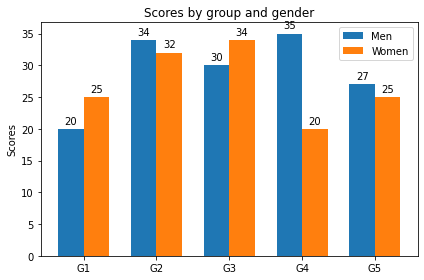

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [33]:
men_means

[20, 34, 30, 35, 27]